In [1]:
import pandas as pd
from datetime import datetime
from statistics import mean
import numpy as np
from NowcastingEco import NowcastingEco

In [2]:
# Local path for the headlines data
df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')

/var/folders/4q/7w99lfvx0cl74dtmhv3y6gfc0000gn/T/ipykernel_15176/1879980346.py:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/amaury/Documents/!DSBA/CRP/headlines_english_arabic_countries.csv')


In [3]:
crash_test = NowcastingEco(df)
crash_test.clean_data() # Egypt/KSA/UAE

/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:98: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.date = self.df.date.apply(lambda x: datetime.strptime(str(int(x)), '%Y%m%d%H%M%S'))
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df.tone = self.df.tone.apply(lambda x: self.convert_into_list(x))
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:102: SettingWithCopyWarning: 
A 

,gkgrecordid,date,subsourcecommonname,tone,translationinfo,cleaned_xml,cleaned_locations,cleaned_url,cleaned_themes
0,20151011213000-456,2015-10-11 21:30:00,dailynewsegypt.com,"[1.76991150442478, 2.54424778761062, 0.7743362...",NaN,[NA],"[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[tgm, markets, sqm, for, cleopatra, real, esta...","[ECON, WORLDCURRENCIES, DOLLAR, ECON, WORLDCUR..."
4,20151011150000-503,2015-10-11 15:00:00,dailynewsegypt.com,"[-9.05730129390018, 0.924214417744917, 9.98151...",NaN,[NA],"[Egypt, Egypt, Egypt, Egypt, Egypt]","[sharp, decline, in, reported, terrorist, atta...","[KIDNAP, EXTREMISM, BORDER, TAX, RELIGION, MUS..."
10,20151017171500-1106,2015-10-17 17:15:00,daytondailynews.com,"[-2.88753799392097, 1.97568389057751, 4.863221...",NaN,[NA],"[Egyptians, Egyptians, Egyptians, Egyptians, E...",[],"[GENERAL, GOVERNMENT, GENERAL, GOVERNMENT, GEN..."
12,20151017104500-173,2015-10-17 10:45:00,appeal-democrat.com,"[-4.8, 0, 4.8, 4.8, 20.8, 0, 204]",NaN,[NA],"[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[voting, begins, in, egypt, s, parliamentary, ...","[TAX, FNCACT, CANDIDATE, TAX, FNCACT, CANDIDAT..."
13,20151017104500-276,2015-10-17 10:45:00,thepublicopinion.com,"[-4.07124681933842, 0, 4.07124681933842, 4.071...",NaN,[NA],"[Egypt, Egypt, Egypt, Egypt, Egyptians, Egypt,...","[voting, begins, in, egypt, s, parliamentary, ...","[TAX, FNCACT, CANDIDATES, TAX, FNCACT, CANDIDA..."
...,...,...,...,...,...,...,...,...,...
773782,20230302204500-1653,2023-03-02 20:45:00,kawc.org,"[-0.975609756097561, 2.19512195121951, 3.17073...",NaN,"[A, SCAN, DISCOVERS, A, SEALED,, 30-FOOT-LONG,...","[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...","[a, scan, discovers, a, sealed, foot, long, ha...","[EDUCATION, TAX, FNCACT, PROFESSOR, EPU, POLIC..."
773803,20230303171500-1532,2023-03-03 17:15:00,thedickinsonpress.com,"[0.648648648648649, 4, 3.35135135135135, 7.351...",NaN,"[CONTROVERSIAL, CHANGES, TO, NOMINATING, PROCE...",[Egypt],"[south, dakota, controversial, changes, to, no...","[TAX, FNCACT, CANDIDATES, TAX, FNCACT, CANDIDA..."
773812,20230307234500-628,2023-03-07 23:45:00,china.org.cn,"[-10.1769911504425, 0.884955752212389, 11.0619...",NaN,"[2, KILLED,, 16, INJURED, AFTER, TRAIN, DERAIL...","[Egypt, Egypt, Egypt, Egypt, Egypt, Egypt, Egy...",[],"[GENERAL, HEALTH, MEDICAL, CRISISLEX, C04, LOG..."
773835,20230301120000-384,2023-03-01 12:00:00,businesstraveller.com,"[0.374531835205993, 0.374531835205993, 0, 0.37...",NaN,"[EGYPTAIR, BECOMES, FIRST, AFRICAN, CARRIER, T...","[Egypt, Egypt, Egypt]","[egyptair, becomes, first, african, carrier, t...","[LEASING, USPEC, POLICY1, EPU, ECONOMY, EPU, E..."


/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['mean_tone'] = self.df.tone.apply(lambda x: x[0])
/Users/amaury/Documents/!DSBA/CRP/CRP_Egyptian_Economy/NowcastingEco.py:180: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['binary_tone'] = self.df.tone.apply(lambda x: 1 if x[1] > x[2] else 0)


The correlation between the average tones and the Exports from 2015 to 2022 is: 0.7654664546681031.
The correlation between the positive article ratio and the Exports from 2015 to 2022 is: 0.563553206174574.


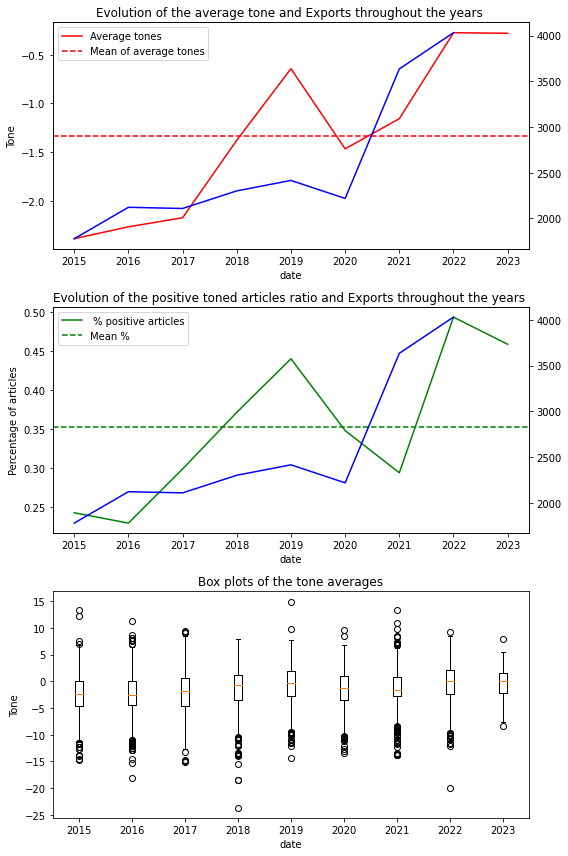

Number of articles per year for the filtered country and theme:  date
2015    2175
2016    2924
2017    1709
2018    1318
2019     949
2020     580
2021    1020
2022     836
2023     159
Name: cleaned_themes, dtype: int64


In [4]:
crash_test.tone_analysis(path='/Users/amaury/Documents/!DSBA/CRP/Bloomberg_Data_Egypt_datefixed.xlsx',indicator=True) 